## Throughput

In [15]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from ipywidgets import Layout, Button, Box
from nested_dict import nested_dict

import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns
import ipywidgets as widgets

sns.set(style="whitegrid")

In [16]:
# Initialization
artifacts_dir = "/Users/sk/sandmark/notebooks/interactive/test/artifacts/"
selected_files = []
selected_baseline = ""
enable_gui = True

In [17]:
# Parameters cell
if enable_gui == False:
    print(enable_gui)
    print(artifacts_dir)
    print(selected_benches)
    print(selected_baseline)

In [18]:
if enable_gui:
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))

In [21]:
bench_files = []

artifacts_path = artifacts_dir.split("/artifacts/")[0]

for root, dirs, files in os.walk(artifacts_dir):
    for file in files:
        if file.endswith(".orun.summary.bench"):
            # print(root)
            f = root.split("/artifacts/")[1]
            # print(f)
            if (len (f.split("/")) <= 5):
                bench_files.append((os.path.join(root, file)))

In [22]:
len(bench_files)

2

In [27]:
nd = nested_dict(2, list)
for x in bench_files:
    l = x.split("/artifacts/")[1]
    d = l.split("/")
    host      = d[0]
    print(host)
    repo      = d[1]
    print(repo)
    commit    = d[2]
    print(commit)
    variant   = d[3]
    print(variant)
    timestamp = d[4]
    ocaml     = d[5]
    value      = commit + " " + variant + " " + timestamp + " " + ocaml
    nd[host][repo].append(value)
benches = nd.to_dict()    

turing.ocamllabs.io
ocaml_5.00__5.00
b73cbbea4bc40ffd26a459d594a39b99cec4273d
5.00+stable+sequential_1.orun.summary.bench


IndexError: list index out of range

In [8]:
benches

{'spock.ocamllabs.io': {'ocaml_4.06__4.06': ['fb175b09fd23129c9dd7db0c01115d2610c3f6e1 vanilla 20191011_054236 4.06.1.orun.bench'],
  'ocaml_4.09__4.09': ['7fbae5ef8a47b782d2eff7a45673a55f50b2bdd7 vanilla 20191012_044601 4.09.0.orun.bench']}}

In [9]:
def f(x):
    return x

def disp(benches):
    def select_repo(host):
        repoW.options = benches[host]
    
    def select_commit(repo):
        commitW.options = repo

    def select_variant(commit):
        return None

    hostW = widgets.Dropdown(options=benches.keys(), description='Host', disabled=False)
    hostS = hostW.value
    hostD = widgets.interactive(select_repo, host=hostW)

    repoW = widgets.Dropdown(options=benches[hostS].keys(), description='Repository', disabled=False)
    repoS = repoW.value
    repoD = widgets.interactive(select_commit, repo=repoW)

    commitW = widgets.Dropdown(options=benches[hostS][repoS], description='Commit', disabled=False)
    commitS = commitW.value
    commitD = widgets.interactive(select_variant, commit=commitW)

    items_layout = Layout( width='auto' )
    
    box_layout = Layout(display='flex',
                       flex_flow='row wrap',
                       align_items='flex-start',
                       #border='solid',
                       width='100%')
    
    items = [hostD, repoD, commitD]
    box = Box(children=items, layout=box_layout)    
    
    # display(hostD, repoD, commitD)
    display(box)
    return (hostD, repoD, commitD)

def get_filename(h, r, c):
    host = h.children[0].value
    # print(host)
    
    repos = list(benches[host].keys())
    repo= repos[r.children[0].index]
    # print(repo)
    
    entries = list(benches[host][repo])
    commit_last = entries[c.children[0].index]

    commit_list = commit_last.split(" ")
    filename = os.path.join(artifacts_path, 'artifacts', host, repo, '/'.join(commit_list))
    print(filename)
    return(filename)

In [11]:
comparisons = interactive(f, x=widgets.IntText(value=2, 
                                               description='Comparisons', 
                                               disabled=False))
display(comparisons)

interactive(children=(IntText(value=2, description='Comparisons'), Output()), _dom_classes=('widget-interact',…

In [12]:
print(comparisons.result)

2


In [14]:
matrix = [[0 for x in range(4)] for y in range(comparisons.result)]
    
for i in range(comparisons.result):
    matrix[i][0], matrix[i][1], matrix[i][2] = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Host', options=('spock.ocamllabs.io',), value='spock…

Box(children=(interactive(children=(Dropdown(description='Host', options=('spock.ocamllabs.io',), value='spock…

In [15]:
for i in range(comparisons.result):
    matrix[i][3] = get_filename(matrix[i][0], matrix[i][1], matrix[i][2])

/Users/sk/sandmark/notebooks/interactive/test/artifacts/spock.ocamllabs.io/ocaml_4.06__4.06/fb175b09fd23129c9dd7db0c01115d2610c3f6e1/vanilla/20191011_054236/4.06.1.orun.bench
/Users/sk/sandmark/notebooks/interactive/test/artifacts/spock.ocamllabs.io/ocaml_4.09__4.09/7fbae5ef8a47b782d2eff7a45673a55f50b2bdd7/vanilla/20191012_044601/4.09.0.orun.bench


In [16]:
for i in range (comparisons.result):
    print(matrix[i][3])
    selected_files.append(matrix[i][3])

/Users/sk/sandmark/notebooks/interactive/test/artifacts/spock.ocamllabs.io/ocaml_4.06__4.06/fb175b09fd23129c9dd7db0c01115d2610c3f6e1/vanilla/20191011_054236/4.06.1.orun.bench
/Users/sk/sandmark/notebooks/interactive/test/artifacts/spock.ocamllabs.io/ocaml_4.09__4.09/7fbae5ef8a47b782d2eff7a45673a55f50b2bdd7/vanilla/20191012_044601/4.09.0.orun.bench


In [17]:
if enable_gui == False:
    for i in selected_benches:
        commit_list = i[2].split(" ")
        selected_files.append(os.path.join(artifacts_dir, i[0], i[1], '/'.join(commit_list)))

In [21]:
data_frames = []

for file in selected_files:
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pd.json_normalize(data)
        df['variant'] = os.path.basename(file).replace(".orun.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,ocaml_url,ocaml.version,ocaml.c_compiler,ocaml.architecture,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant,ocaml.supports_shared_libraries
52,alloc.200_000,./alloc.exe 200_000,1.326016,1.214766,0.000000,4528,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,69,69,3051,0,491520,1,491520,0,4.06.1,NaN
52,alloc.200_000,./alloc.exe 200_000,1.264241,1.159087,0.000000,4528,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,69,69,3051,0,491520,1,491520,0,4.09.0,true
181,alt-ergo.fill.why,alt-ergo benchmarks/alt-ergo/fill.why,2.400484,2.193901,0.205679,358196,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,43621442,45784355,695,13,49650688,34,49650688,0,4.09.0,true
181,alt-ergo.fill.why,alt-ergo benchmarks/alt-ergo/fill.why,2.357389,2.216468,0.140029,351052,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,43562969,45716488,691,11,43174400,33,43174400,0,4.06.1,NaN
163,alt-ergo.yyll.why,alt-ergo benchmarks/alt-ergo/yyll.why,21.333243,21.202076,0.125729,284552,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,54430913,60598089,7899,20,37542912,32,37542912,0,4.09.0,true
163,alt-ergo.yyll.why,alt-ergo benchmarks/alt-ergo/yyll.why,22.609081,22.476218,0.127978,282152,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,54094431,60246498,7920,19,37542912,32,37542912,0,4.06.1,NaN
88,array_bench.array_fold_1000_100000,./array_bench.exe array_fold 1000 100000,0.503468,0.499165,0.003993,2500,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,0,2002,0,0,491520,1,491520,0,4.06.1,NaN
88,array_bench.array_fold_1000_100000,./array_bench.exe array_fold 1000 100000,0.392455,0.392141,0.000000,2568,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,0,2002,0,0,491520,1,491520,0,4.09.0,true
135,array_bench.array_forall_1000_100000,./array_bench.exe array_forall 1000 100000,0.509463,0.509149,0.000000,4548,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,80,2082,2,0,491520,1,491520,0,4.06.1,NaN
135,array_bench.array_forall_1000_100000,./array_bench.exe array_forall 1000 100000,0.561067,0.560761,0.000000,4616,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,80,2082,2,0,491520,1,491520,0,4.09.0,true


### Drop some benchmarks


In [22]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,ocaml_url,ocaml.version,ocaml.c_compiler,ocaml.architecture,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant,ocaml.supports_shared_libraries
52,alloc.200_000,./alloc.exe 200_000,1.326016,1.214766,0.000000,4528,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,69,69,3051,0,491520,1,491520,0,4.06.1,NaN
52,alloc.200_000,./alloc.exe 200_000,1.264241,1.159087,0.000000,4528,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,69,69,3051,0,491520,1,491520,0,4.09.0,true
88,array_bench.array_fold_1000_100000,./array_bench.exe array_fold 1000 100000,0.503468,0.499165,0.003993,2500,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,0,2002,0,0,491520,1,491520,0,4.06.1,NaN
88,array_bench.array_fold_1000_100000,./array_bench.exe array_fold 1000 100000,0.392455,0.392141,0.000000,2568,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,0,2002,0,0,491520,1,491520,0,4.09.0,true
135,array_bench.array_forall_1000_100000,./array_bench.exe array_forall 1000 100000,0.509463,0.509149,0.000000,4548,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,80,2082,2,0,491520,1,491520,0,4.06.1,NaN
135,array_bench.array_forall_1000_100000,./array_bench.exe array_forall 1000 100000,0.561067,0.560761,0.000000,4616,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,80,2082,2,0,491520,1,491520,0,4.09.0,true
80,array_bench.array_iter_1000_100000,./array_bench.exe array_iter 1000 100000,0.447943,0.447641,0.000000,2568,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,0,2002,0,0,491520,1,491520,0,4.09.0,true
80,array_bench.array_iter_1000_100000,./array_bench.exe array_iter 1000 100000,0.447950,0.447660,0.000000,2500,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,0,2002,0,0,491520,1,491520,0,4.06.1,NaN
91,bdd.,./bdd.exe,0.414256,0.413930,0.000000,9736,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,525944,664828,295,5,650240,3,650240,0,4.06.1,NaN
91,bdd.,./bdd.exe,0.415475,0.415136,0.000000,9744,https://github.com/ocaml/ocaml/archive/7fbae5e...,4.09.0+dev7-2019-09-17,gcc,amd64,...,525944,664828,295,5,650240,3,650240,0,4.09.0,true


### Selection example

```
select * from df where variant = '4.10.0+trunk' and time_secs > 10
```

In [23]:
baseline_h, baseline_r, baseline_c = disp(benches)

Box(children=(interactive(children=(Dropdown(description='Host', options=('spock.ocamllabs.io',), value='spock…

In [24]:
selected_baseline = baseline_c.children[0].value.split(" ")[3].split(".orun.bench")[0]

print(selected_baseline)

4.06.1


In [25]:
df.loc[(df['variant'] == selected_baseline) & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,ocaml_url,ocaml.version,ocaml.c_compiler,ocaml.architecture,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant,ocaml.supports_shared_libraries
89,cpdf.scale,cpdf scale-to-fit a4landscape -twoup benchmark...,17.386526,17.202648,0.179944,267448,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,85588395,96177799,2268,28,32645632,31,32645632,0,4.06.1,NaN
4,cpdf.squeeze,cpdf -squeeze benchmarks/cpdf/PDFReference16.p...,20.255612,20.063161,0.187992,306864,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,124801844,140472473,1621,33,37542912,32,37542912,0,4.06.1,NaN
116,main.,./main.exe,20.810154,20.799156,0.007999,7204,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,278395,278395,6409,11,163328,2,593408,2,4.06.1,NaN
64,menhir.ocamly.mly,menhir benchmarks/menhir/ocaml.mly --list-erro...,264.886943,262.422864,2.415989,5547076,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,427712881,1147848085,9621,30,704860160,44,704860160,0,4.06.1,NaN
74,menhir.sysver.mly,menhir -v --table benchmarks/menhir/sysver.mly,98.645445,98.164681,0.463927,728024,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,329084634,441682480,31932,57,91529728,38,91529728,0,4.06.1,NaN
155,minilight-ocaml.roomfront.ml.txt,minilight-ocaml benchmarks/minilight/roomfront...,26.760219,26.747611,0.007998,12344,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,10623110,10639828,37211,56,748032,4,748032,0,4.06.1,NaN
121,set_bench.set_add_rem_20000000,./set_bench.exe set_add_rem 20000000,11.010993,11.009425,0.000000,5184,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,581682,581682,8105,188,73728,1,565248,2,4.06.1,NaN
39,string_bench.string_map_20000000,./string_bench.exe string_map 20000000,38.951958,38.947416,0.000000,4616,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,77,77,5569,0,491520,1,491520,0,4.06.1,NaN
21,test_lwt.200,./test_lwt.exe 200,26.403497,26.399729,0.000000,9912,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,11171651,27620791,4517,429,235520,3,604160,2,4.06.1,NaN
41,thread_ring_lwt_stream.20_000,./thread_ring_lwt_stream.exe 20_000,15.583493,15.576749,0.004000,9872,https://github.com/ocaml/ocaml/archive/fb175b0...,4.06.1+dev4-2017-02-05,gcc,amd64,...,443300066,443301074,9877,3703,440320,6,624640,2,4.06.1,NaN


In [26]:
df.loc[df['name'] == 'LU_decomposition.1024']

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,ocaml_url,ocaml.version,ocaml.c_compiler,ocaml.architecture,...,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant,ocaml.supports_shared_libraries


### Projection example

```
select name, variant, time_secs from df
```

In [27]:
df.filter(['name','variant','time_secs'])

,name,variant,time_secs
52,alloc.200_000,4.06.1,1.326016
52,alloc.200_000,4.09.0,1.264241
88,array_bench.array_fold_1000_100000,4.06.1,0.503468
88,array_bench.array_fold_1000_100000,4.09.0,0.392455
135,array_bench.array_forall_1000_100000,4.06.1,0.509463
135,array_bench.array_forall_1000_100000,4.09.0,0.561067
80,array_bench.array_iter_1000_100000,4.09.0,0.447943
80,array_bench.array_iter_1000_100000,4.06.1,0.447950
91,bdd.,4.06.1,0.414256
91,bdd.,4.09.0,0.415475


## Time

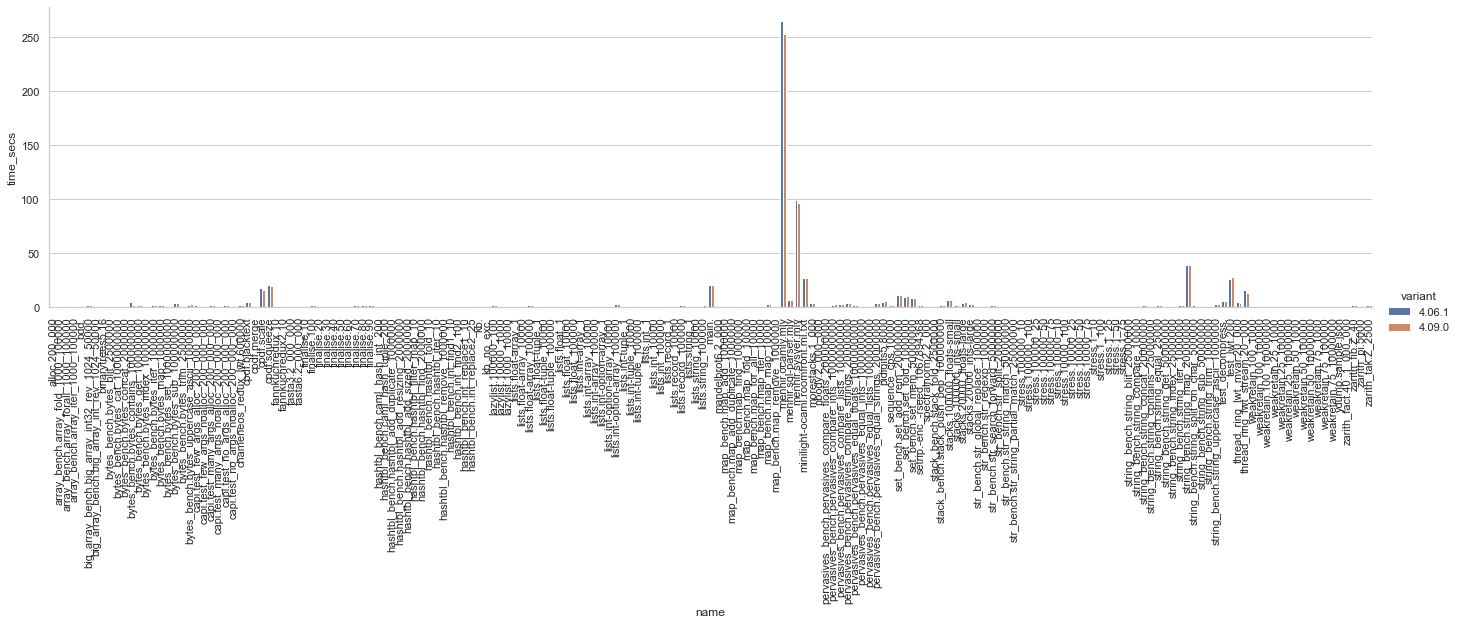

In [28]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [29]:
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
                print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_91754/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


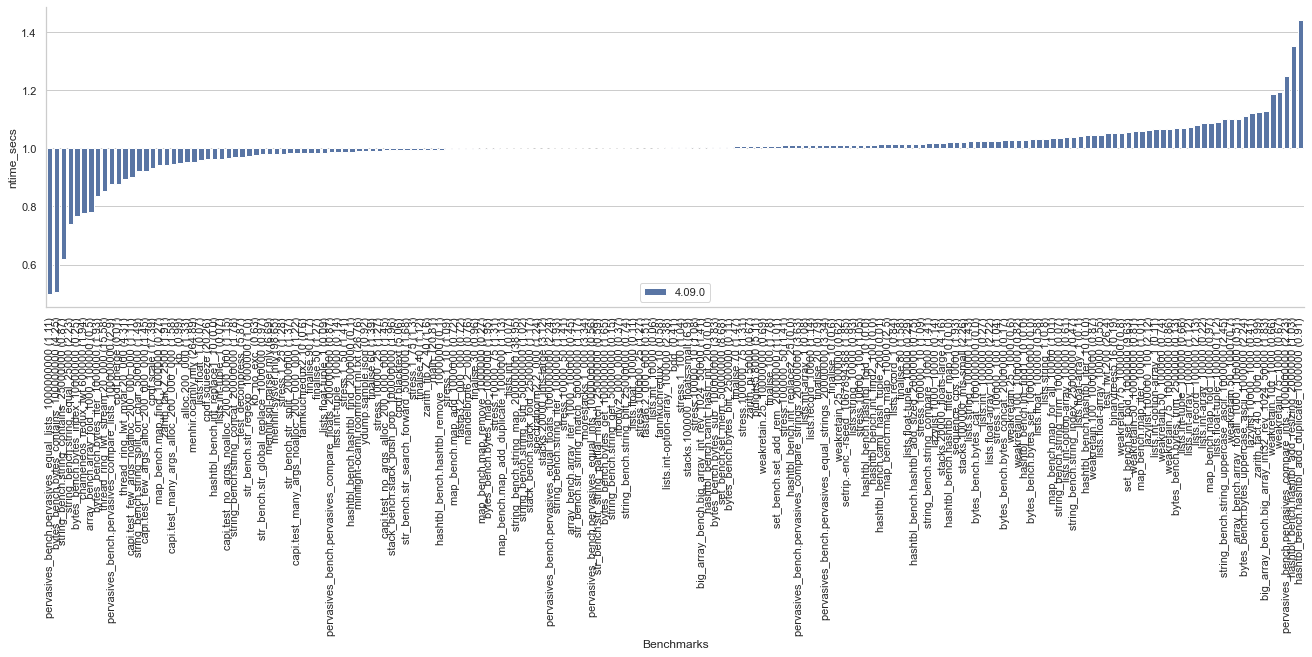

In [30]:
ndf = normalise(df, selected_baseline, 'time_secs')
plot_normalised(ndf, selected_baseline,'ntime_secs')

## Top heap words

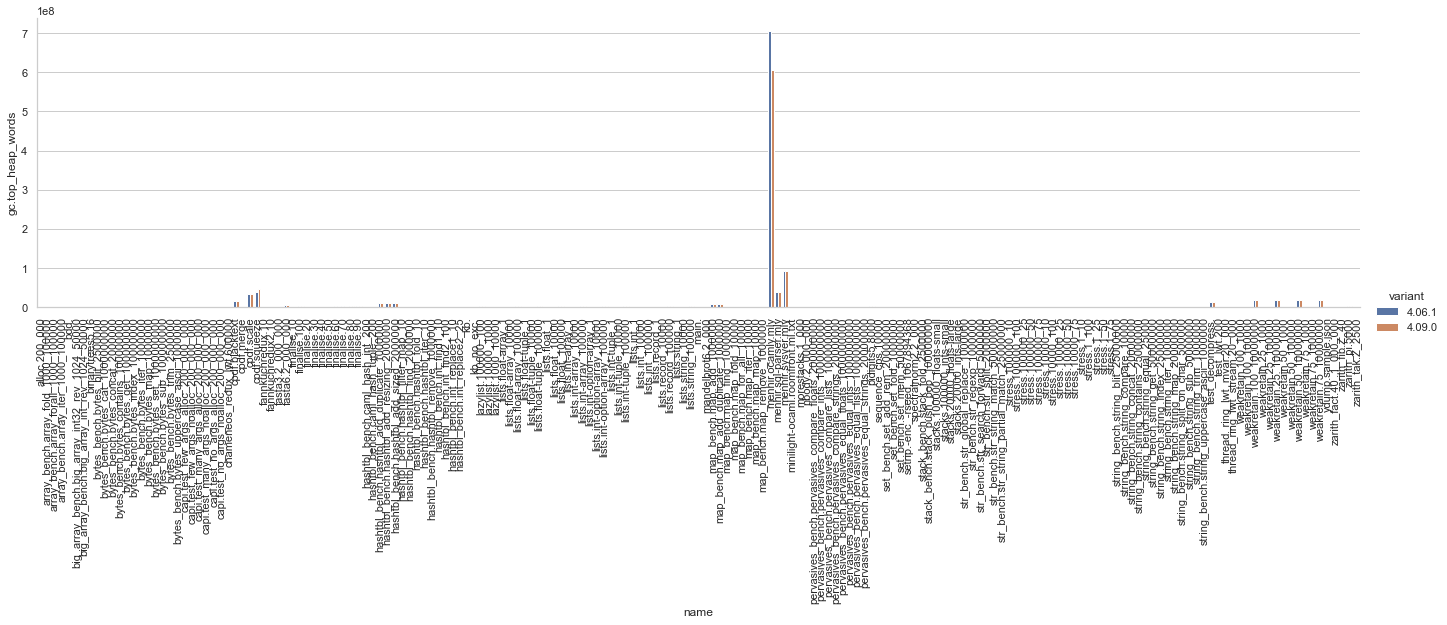

In [31]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_91754/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


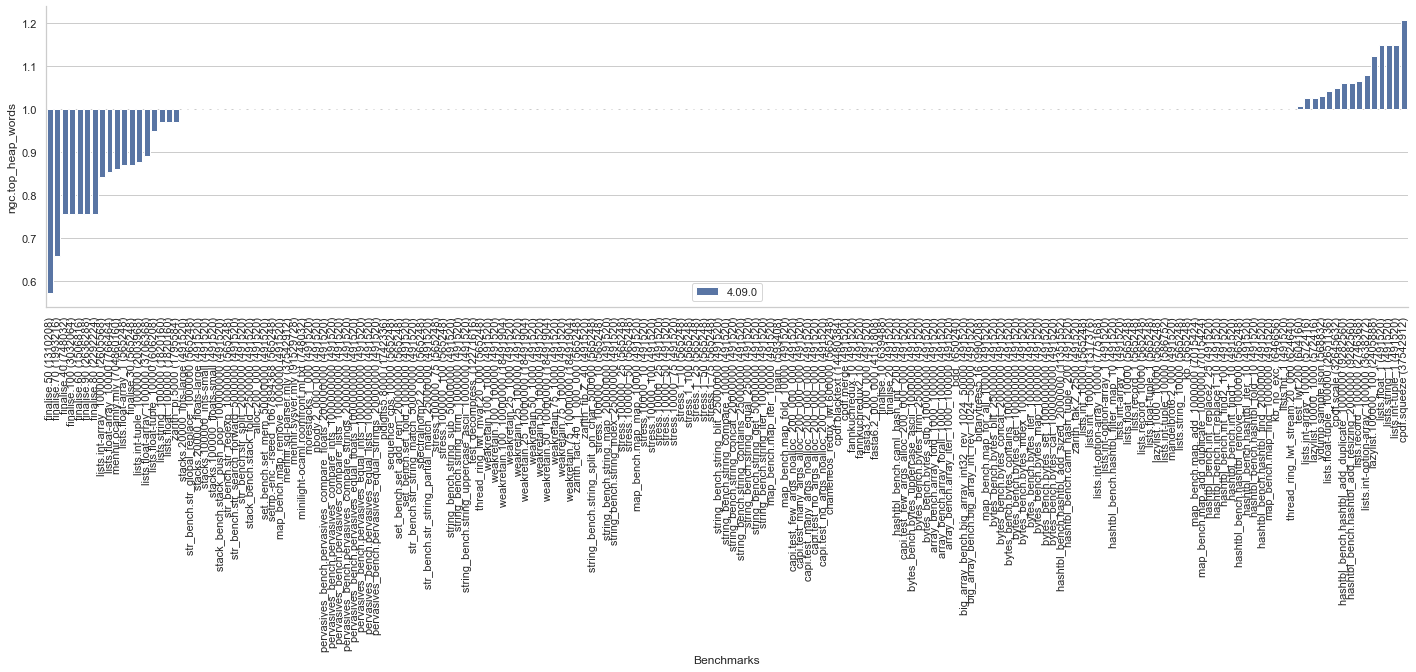

In [32]:
ndf = normalise(df, selected_baseline, 'gc.top_heap_words')
plot_normalised(ndf, selected_baseline,'ngc.top_heap_words')

## Max RSS (KB)

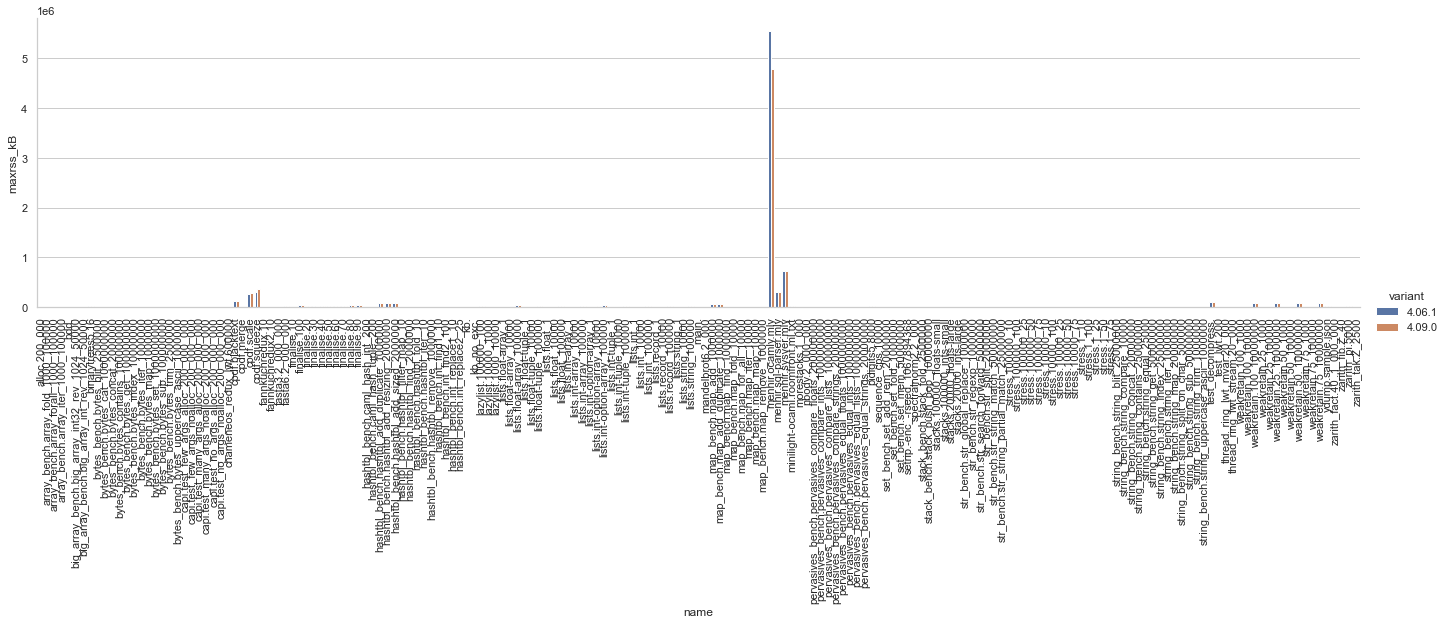

In [33]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

/var/folders/kt/n9q5lcv93sg3lm2wsrn1kkrw0000gp/T/ipykernel_91754/2291190651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["display_name"] = pd.Series(disp_name, index=df.index)


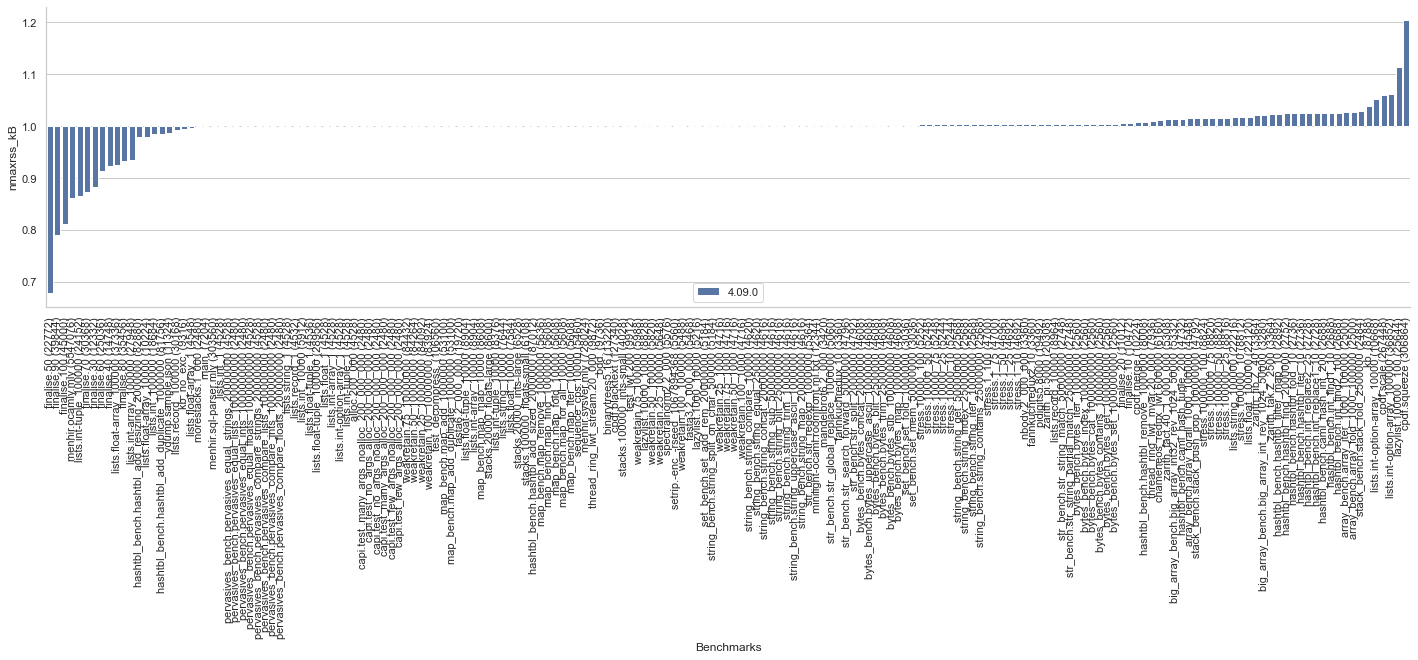

In [34]:
ndf = normalise(df, selected_baseline,'maxrss_kB')
plot_normalised(ndf, selected_baseline,'nmaxrss_kB')

## Major Collections

In [ ]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df, selected_baseline,'gc.major_collections')
plot_normalised(ndf, selected_baseline,'ngc.major_collections')
ndf

## Major words

In [ ]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [ ]:
ndf = normalise(df, selected_baseline,'gc.major_words')
plot_normalised(ndf, selected_baseline,'ngc.major_words')

## Minor Collections

In [ ]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

In [ ]:
ndf = normalise(df, selected_baseline, 'gc.minor_collections')
plot_normalised(ndf, selected_baseline, 'ngc.minor_collections')